In [18]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Load MNIST Data

In [19]:
transform = transforms.Compose(
    [transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

batch_size = 5
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=False)

View some of the images

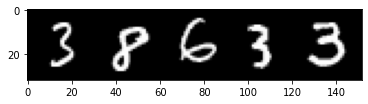

In [20]:
#imshow taken from https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

train_iterator = iter(trainloader)
images, labels = next(train_iterator)
imshow(torchvision.utils.make_grid(images))

In [ ]:
Create Neural Network

In [38]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 3, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(3, 10, 5)
        self.fc1 = nn.Linear(160, 100)
        self.fc2 = nn.Linear(100, 60)
        self.fc3 = nn.Linear(60, 10)
        
        #self.conv1 = nn.Conv2d(3, 6, 5)
        #self.pool = nn.MaxPool2d(2, 2)
        #self.conv2 = nn.Conv2d(6, 16, 5)
        #self.fc1 = nn.Linear(16 * 5 * 5, 120)
        #self.fc2 = nn.Linear(120, 84)
        #self.fc3 = nn.Linear(84, 10)
        
        
    def forward(self, x):
        x = self.pool(torch.sigmoid(self.conv1(x)))
        x = self.pool(torch.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
    
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

Train Model

In [39]:
for epoch in range(3):
    current_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        current_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {current_loss / 2000:.3f}')
        current_loss = 0.0

[1,  2000] loss: 0.993
[1,  4000] loss: 1.198
[1,  6000] loss: 1.380
[1,  8000] loss: 1.535
[1, 10000] loss: 1.688
[1, 12000] loss: 1.816
[2,  2000] loss: 0.121
[2,  4000] loss: 0.230
[2,  6000] loss: 0.356
[2,  8000] loss: 0.462
[2, 10000] loss: 0.588
[2, 12000] loss: 0.723
[3,  2000] loss: 0.101
[3,  4000] loss: 0.210
[3,  6000] loss: 0.331
[3,  8000] loss: 0.423
[3, 10000] loss: 0.538
[3, 12000] loss: 0.654


View parameters, and calculate node strength of first node in linear layer

In [44]:
weight_layer1 = net.fc1.weight.data
weight_layer2 = net.fc2.weight.data
weight_layer3 = net.fc3.weight.data
bias_layer1 = net.fc1.bias.data
bias_layer2 = net.fc2.bias.data
bias_layer3 = net.fc3.bias.data

print(weight_layer1.size(dim=0))
print(weight_layer2.size())
print(weight_layer3.size())
print(bias_layer1.size(dim=0))

node_strength_node1_1 = 0
for i in range(weight_layer1.size(dim=0)):
    node_strength_node1_1 += weight_layer1[i, 0]
for b in range(bias_layer1.size(dim=0)):
    node_strength_node1_1 += bias_layer1[b]
for j in range(weight_layer2.size(dim=1)):
    node_strength_node1_1 += weight_layer2[0, j]
print(node_strength_node1_1)
    

100
torch.Size([60, 100])
torch.Size([10, 60])
100
tensor(-179.5608)
